In [54]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as scipy
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame

In [55]:

data = pd.read_csv("/kaggle/input/us-used-cars-dataset/used_cars_data.csv", low_memory=False, nrows=1000000)
   

In [56]:
pd.set_option('display.max_columns', None)


In [57]:
data.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,NaN,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [58]:
data.shape

(1000000, 66)

In [59]:
col_names = pd.DataFrame(data.columns)
col_names

,0
0,vin
1,back_legroom
2,bed
3,bed_height
4,bed_length
...,...
61,wheel_system
62,wheel_system_display
63,wheelbase
64,width


In [60]:
types_count = data.groupby('body_type')['vin'].nunique()
types_count

body_type
Convertible          7617
Coupe               20489
Hatchback           28867
Minivan             25581
Pickup Truck       134199
SUV / Crossover    508659
Sedan              236815
Van                 19313
Wagon               14091
Name: vin, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


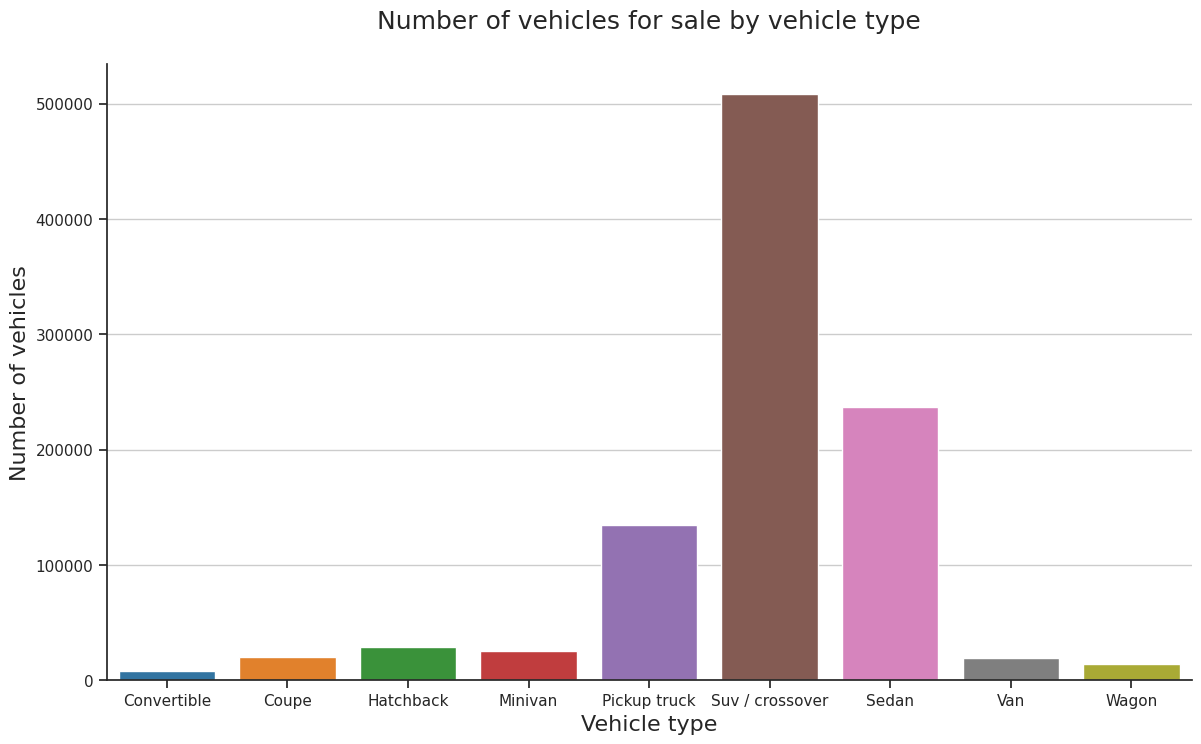

In [61]:
# Plot
indexes = [i.capitalize() for i in types_count.index]
fig = plt.figure(figsize=(14,8))

sns.set_style('ticks')
plt.grid(True)

sns.barplot(x=indexes, y=types_count.values, palette=sns.color_palette('tab10'))
sns.despine()

plt.title('Number of vehicles for sale by vehicle type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Number of vehicles', fontdict={'fontsize': 16})

plt.show()

In [62]:
q1, q3 = np.percentile(data.price, [25, 75])
iqr = q3 - q1  # Interquartile range

max_value = q3 + 1.5 * iqr
max_value

66762.5

In [63]:
plot_df = data[data.price <= max_value].dropna(subset=['body_type'])
plot_df['body_type'] = plot_df.body_type.str.capitalize()
plot_df.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,Suv / crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,Suv / crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,NaN,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,Suv / crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
6,3MZBPABL6KM107908,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,447,00960,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",I4,2500.0,I4,SONIC SILVER,NaN,NaN,True,Jeep,42.3 in,13.2 gal,Gasoline,NaN,56.9 in,NaN,186.0,Black,NaN,NaN,NaN,True,NaN,18.3988,183.5 in,2019-06-20,SILVER,244110426,-66.1582,https://static.cargurus.com/images/forsale/201...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5 seats,14.0,MAZDA3,NaN,"186 hp @ 6,000 RPM",23695.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"186 lb-ft @ 4,000 RPM",A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019


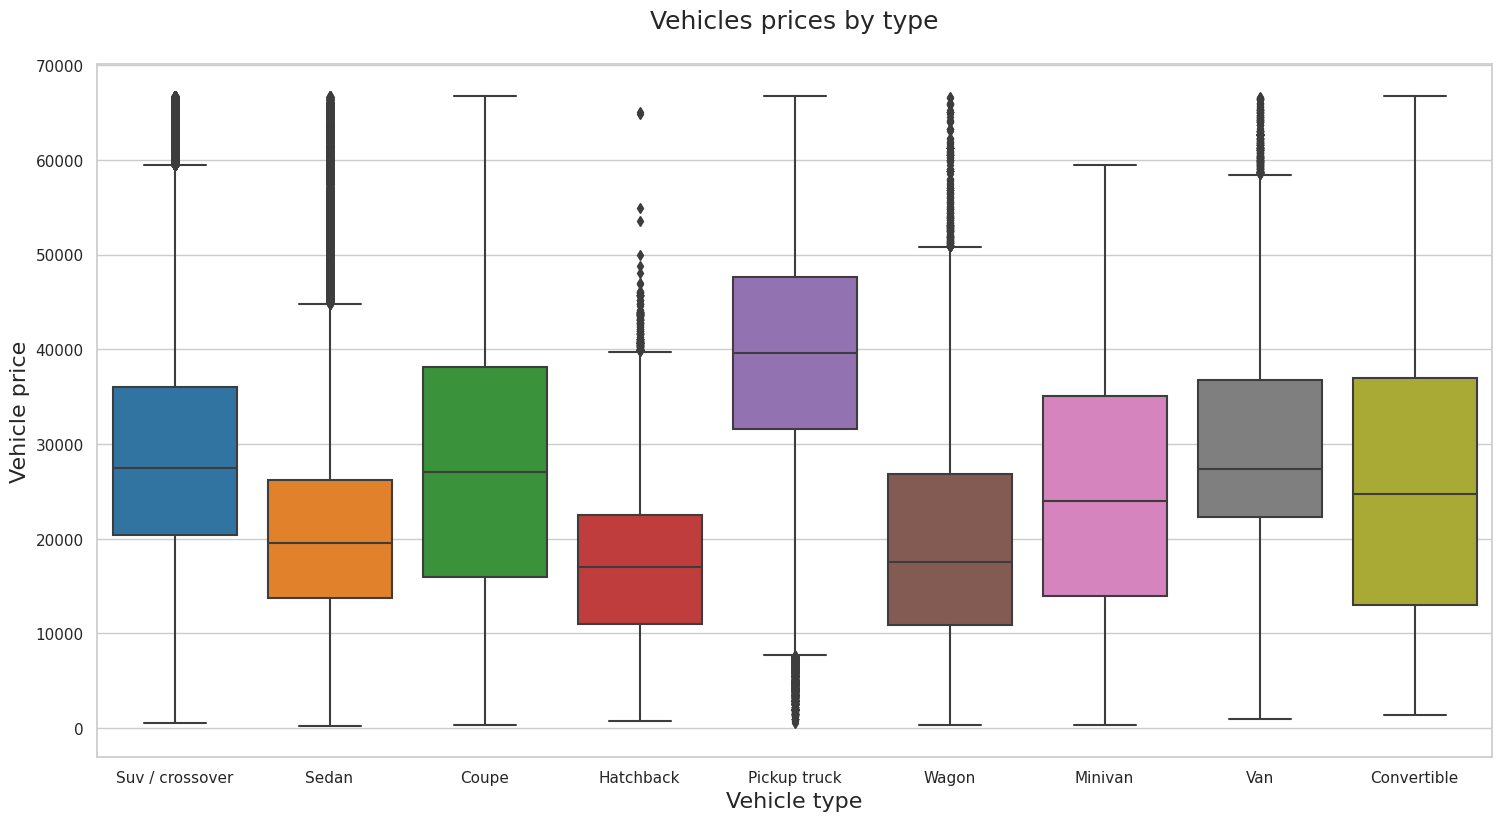

In [64]:
# BoxPlot
plt.figure(figsize=(18, 9))

sns.set_style('whitegrid')
sns.boxplot(x='body_type', y='price', data=plot_df, palette=sns.color_palette('tab10'))

plt.title('Vehicles prices by type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Vehicle price', fontdict={'fontsize': 16})

plt.show()

In [65]:
brand_count = data.groupby('make_name')['vin'].nunique().sort_values(ascending=False)
brand_count

make_name
Ford         155958
Chevrolet    126211
Honda         76727
Toyota        74278
Jeep          64612
              ...  
Eagle             1
Daewoo            1
Pagani            1
Bugatti           1
Geo               1
Name: vin, Length: 80, dtype: int64

In [66]:
prices_df = data.groupby(['make_name', 'body_type'])['price'].median()
prices_df

make_name   body_type      
AM General  SUV / Crossover    45399.0
AMC         Coupe              34900.0
            Sedan              17900.0
Acura       Coupe               5999.0
            SUV / Crossover    37590.0
                                ...   
Volvo       SUV / Crossover    48268.0
            Sedan              32000.0
            Wagon              41600.0
smart       Convertible         7695.0
            Hatchback           8925.0
Name: price, Length: 296, dtype: float64

In [67]:
prices_df = prices_df.reset_index()
prices_df

,make_name,body_type,price
0,AM General,SUV / Crossover,45399.0
1,AMC,Coupe,34900.0
2,AMC,Sedan,17900.0
3,Acura,Coupe,5999.0
4,Acura,SUV / Crossover,37590.0
...,...,...,...
291,Volvo,SUV / Crossover,48268.0
292,Volvo,Sedan,32000.0
293,Volvo,Wagon,41600.0
294,smart,Convertible,7695.0


In [68]:
prices_df = prices_df.rename(columns={'make_name': 'Manufacturer', 'body_type': 'Type', 'price': 'Price'})
prices_df['Manufacturer'] = prices_df['Manufacturer'].str.capitalize()
prices_df['Type'] = prices_df['Type'].str.capitalize()
prices_df = prices_df.pivot(index='Manufacturer', columns='Type', values='Price')
prices_df.fillna(value=0, inplace=True)
prices_df.head(5)

Type,Convertible,Coupe,Hatchback,Minivan,Pickup truck,Sedan,Suv / crossover,Van,Wagon
Manufacturer,,,,,,,,,
Acura,0.0,5999.0,0.0,0.0,0.0,24552.5,37590.0,0.0,12895.0
Alfa romeo,14486.5,69900.0,0.0,0.0,0.0,43545.0,46541.0,0.0,0.0
Am general,0.0,0.0,0.0,0.0,0.0,0.0,45399.0,0.0,0.0
Amc,0.0,34900.0,0.0,0.0,0.0,17900.0,0.0,0.0,0.0
Aston martin,199000.0,177898.5,0.0,0.0,0.0,99784.0,0.0,0.0,0.0


In [ ]:
# Plot

plt.figure(figsize=(18, 22))

sns.set(font_scale=1)

sns.heatmap(data=prices_df, linewidths=0.5,
    annot=True, fmt='g', annot_kws={"fontsize":10},
    cmap=sns.color_palette("rocket_r", as_cmap=True))

plt.title('Average price by manufacturer and vehicle type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Manufacturer', fontdict={'fontsize': 16})

plt.show()

In [70]:
data_sedan = data[data['body_type'].str.contains('Sedan', case=False, na=False)]

In [71]:
data_sedan

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,NaN,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
6,3MZBPABL6KM107908,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,447,00960,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",I4,2500.0,I4,SONIC SILVER,NaN,NaN,True,Jeep,42.3 in,13.2 gal,Gasoline,NaN,56.9 in,NaN,186.0,Black,NaN,NaN,NaN,True,NaN,18.3988,183.5 in,2019-06-20,SILVER,244110426,-66.1582,https://static.cargurus.com/images/forsale/201...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5 seats,14.0,MAZDA3,NaN,"186 hp @ 6,000 RPM",23695.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,"186 lb-ft @ 4,000 RPM",A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
12,WBA8B7C53GK368522,35.1 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,22.0,NaN,1233,00969,"[!@@Additional Info@@!]WHEEL WIDTH: 8,ABS AND ...",I6,3000.0,I6,Silver,False,False,True,FIAT,42 in,15.8 gal,Gasoline,False,56.5 in,33.0,320.0,NaN,False,NaN,NaN,False,NaN,18.3467,182.5 in,2017-04-25,SILVER,173473505,-66.1098,https://static.cargurus.com/images/forsale/201...,"['Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth']",BMW,5 seats,6903.0,3 Series,2.0,"320 hp @ 5,500 RPM",58995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"330 lb-ft @ 1,380 RPM",A,8-Speed Automatic,t58802,340i xDrive Sedan AWD,NaN,AWD,All-Wheel Drive,110.6 in,80 in,2016
14,3MZBPABL1KM108237,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,447,00960,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",I4,2500.0,I4,Snowflake White Pearl Mica,NaN,NaN,True,Jeep,42.3 in,13.2 gal,Gasoline,NaN,56.9 in,NaN,186.0,Black,NaN,NaN,NaN,True,NaN,18.3988,183.5 in,2019-06-20,WHITE,244110428,-66.1582,https://static.cargurus.com/images/forsale/201...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5 seats,204.0,MAZDA3,NaN,"186 hp @ 6,000 RPM",23695.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,"186 lb-ft @ 4,000 RPM",A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
15,3MZBPABL4KM107969,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,447,00960,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",I4,2500.0,I4,Snowflake White Pearl Mica,NaN,NaN,True,Jeep,42.3 in,13.2 gal,Gasoline,NaN,56.9 in,NaN,186.0,Black,NaN,NaN,NaN,True,NaN,18.3988,183.5 in,2019-06-20,WHITE,244110438,-66.1582,https://static.cargurus.com/images/forsale/201...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5 seats,61.0,MAZDA3,NaN,"186 hp @ 6,000 RPM",23695.0,NaN,0,2.800000,370599.0,Flagship Chrysler,NaN,"186 lb-ft @ 4,000 RPM",A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [72]:
# Identify all non-numeric columns
non_numeric_columns = data_sedan.select_dtypes(exclude=[np.number]).columns

print("Non-numeric columns:", non_numeric_columns.tolist())

Non-numeric columns: ['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'dealer_zip', 'description', 'engine_cylinders', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'interior_color', 'isCab', 'is_cpo', 'is_new', 'is_oemcpo', 'length', 'listed_date', 'listing_color', 'main_picture_url', 'major_options', 'make_name', 'maximum_seating', 'model_name', 'power', 'salvage', 'sp_name', 'theft_title', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width']


In [73]:
df_numeric = data_sedan.drop(columns=non_numeric_columns)

# Ensure all columns are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')


In [74]:
cols=['combine_fuel_economy','is_certified','latitude','longitude','listing_id','savings_amount','seller_rating','vehicle_damage_category','sp_id','daysonmarket']
car_data=df_numeric.drop(columns=cols)

In [75]:

car_data

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,price,year
2,17.0,2500.0,23.0,305.0,NaN,3.0,46995.0,2016
6,NaN,2500.0,NaN,186.0,14.0,NaN,23695.0,2019
12,22.0,3000.0,33.0,320.0,6903.0,2.0,58995.0,2016
14,NaN,2500.0,NaN,186.0,204.0,NaN,23695.0,2019
15,NaN,2500.0,NaN,186.0,61.0,NaN,23695.0,2019
...,...,...,...,...,...,...,...,...
999975,NaN,2500.0,NaN,196.0,78279.0,2.0,11990.0,2015
999983,29.0,2000.0,39.0,149.0,4.0,NaN,20479.0,2020
999984,29.0,2000.0,39.0,149.0,6.0,NaN,20418.0,2020
999996,25.0,2000.0,33.0,164.0,5037.0,1.0,15746.0,2017


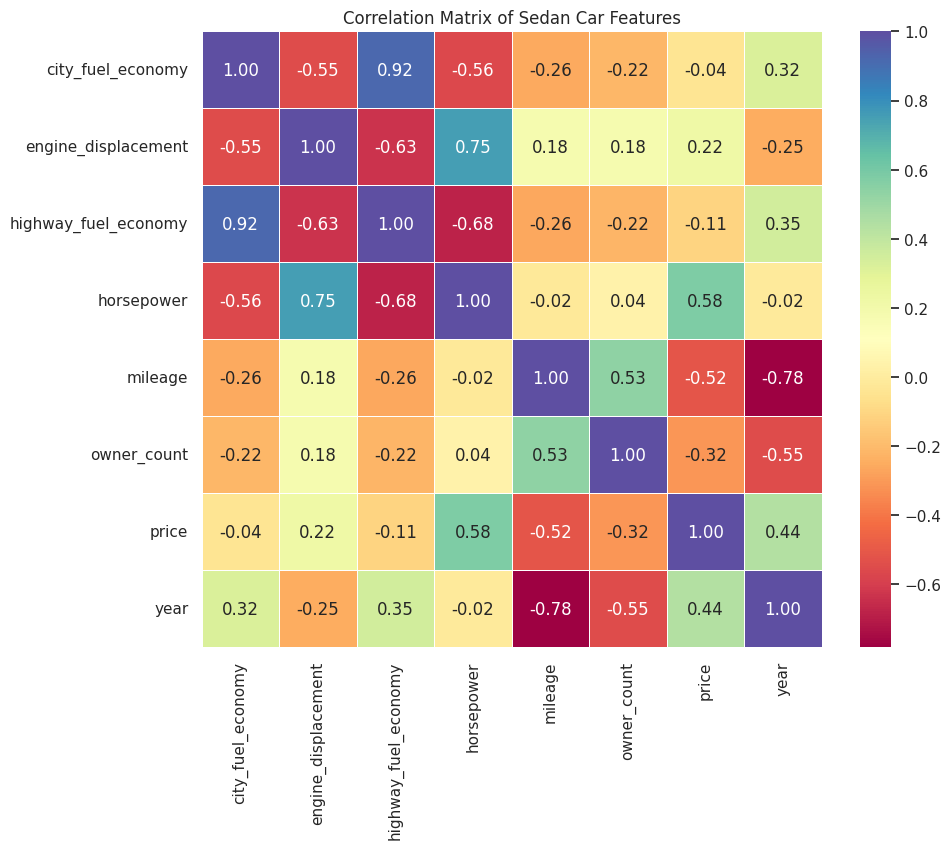

In [76]:
corr = car_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sedan Car Features')
plt.show()

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

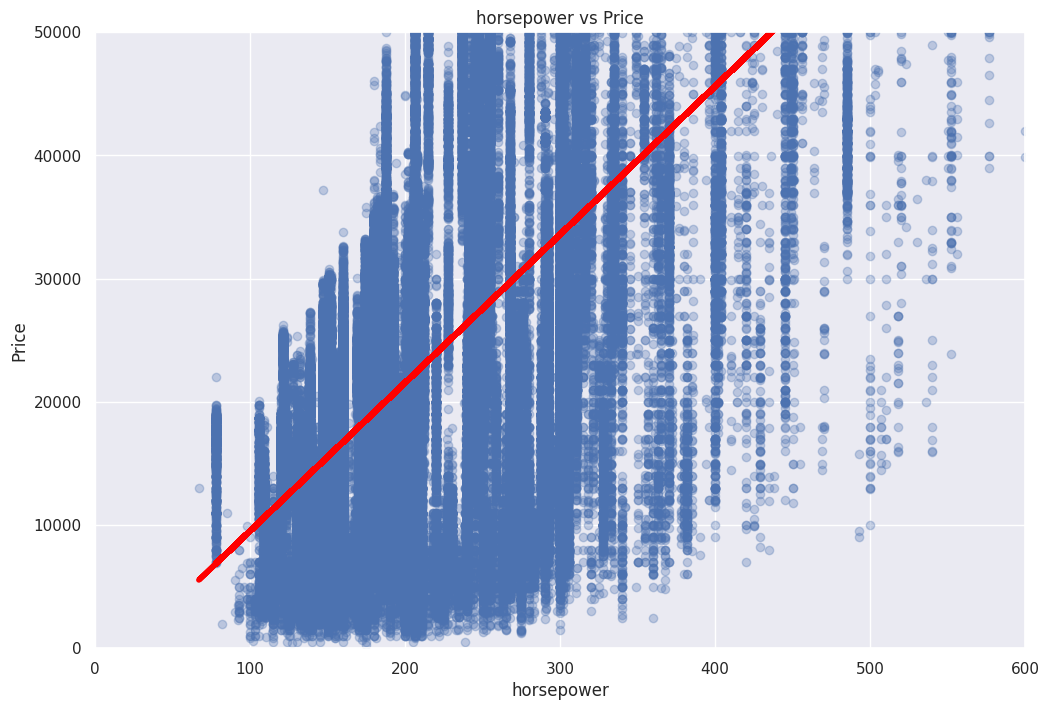

/tmp/ipykernel_33/560886263.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Regression coeficent: %.2f' % regression.coef_ )#theta_1


In [ ]:
X1 = DataFrame(car_data, columns=['horsepower'])
y1 = DataFrame(car_data, columns=['price'])
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X1_imputed = imputer.fit_transform(X1)


plt.figure(figsize=(12,8))
plt.scatter(X1_imputed, y1, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X1_imputed, y1)
plt.plot(X1_imputed, regression.predict(X1_imputed), color='red', linewidth=4)
plt.title('horsepower vs Price')
plt.xlabel('horsepower')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 600)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X1_imputed, y1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X1_imputed, y1))

In [ ]:
X2 = DataFrame(car_data, columns=['mileage']).fillna(value=20000)
y2 = DataFrame(car_data, columns=['price'])
plt.figure(figsize=(12,8))
plt.scatter(X2, y2, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X2, y2)
plt.plot(X2, regression.predict(X2), color='red', linewidth=4)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 200000)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X2, y2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X2, y2))

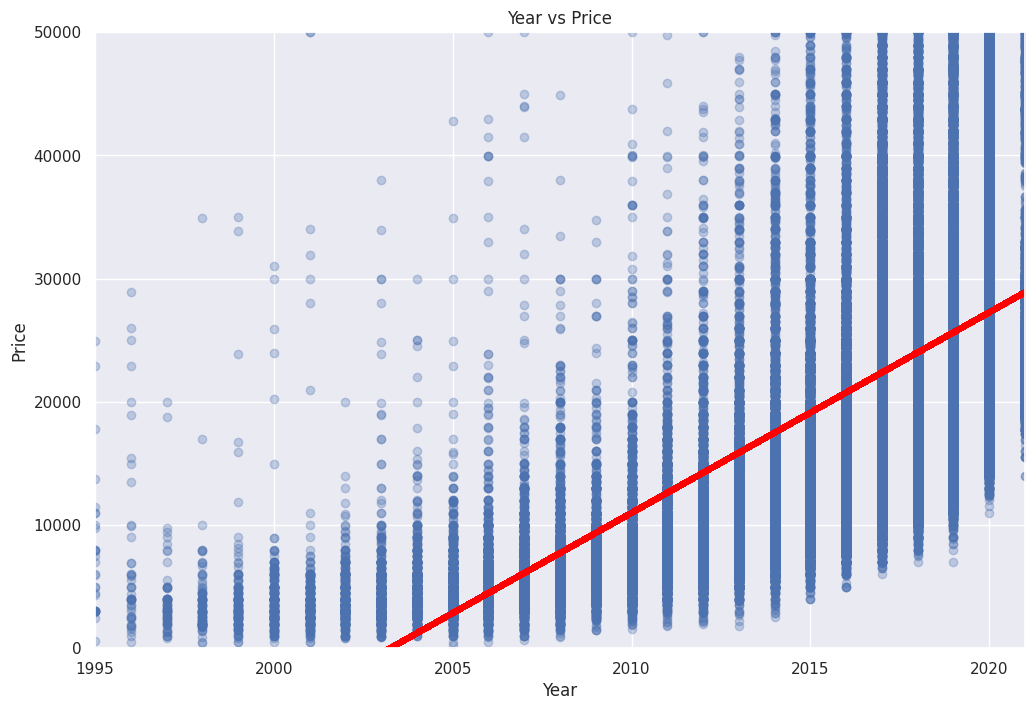

Regression coeficent: 1627.60
Mean squared error: 647529902.59
Coefficient of determination: -37286864.51


/tmp/ipykernel_33/3999161496.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Regression coeficent: %.2f' % regression.coef_ )#theta_1


In [27]:
X1 = DataFrame(car_data, columns=['year'])
y1 = DataFrame(car_data, columns=['price'])
plt.figure(figsize=(12,8))
plt.scatter(X1, y1, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X1, y1)
plt.plot(X1, regression.predict(X1), color='red', linewidth=4)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(1995, 2021)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X1, y1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X1, y1))

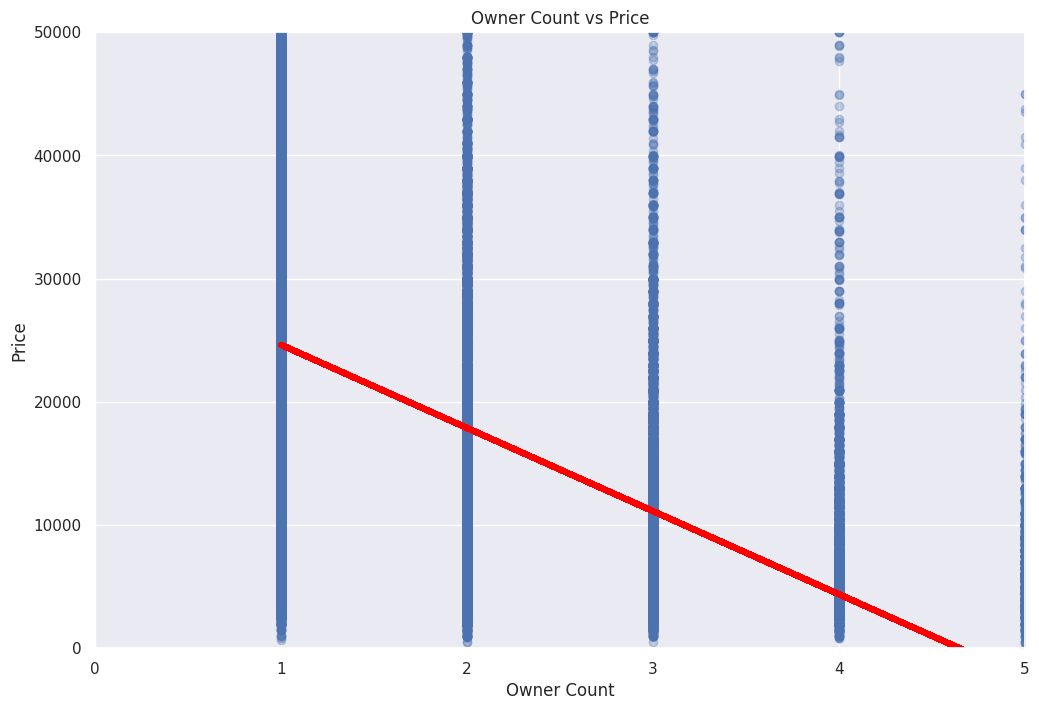

Regression coeficent: -6749.78
Mean squared error: 733384662.88
Coefficient of determination: -1345000498.48


/tmp/ipykernel_33/3913172740.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Regression coeficent: %.2f' % regression.coef_ )#theta_1


In [28]:
X3 = DataFrame(car_data, columns=['owner_count']).fillna(value=1)
y3 = DataFrame(car_data, columns=['price'])
plt.figure(figsize=(12,8))
plt.scatter(X3, y3, alpha = 0.3)
#Draws the Linear Regression
regression = linear_model.LinearRegression()
regression.fit(X3, y3)
plt.plot(X3, regression.predict(X3), color='red', linewidth=4)
plt.title('Owner Count vs Price')
plt.xlabel('Owner Count')
plt.ylabel('Price')
plt.ylim(0, 50000)
plt.xlim(0, 5)
plt.show()

#Step7:Calculating the Regression Theta Coefficient:
print('Regression coeficent: %.2f' % regression.coef_ )#theta_1
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X3, y3))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X3, y3))

In [29]:
cols= ['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'cabin', 'city', 'dealer_zip', 'description', 'engine_cylinders', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'interior_color', 'isCab', 'is_cpo', 'is_new', 'is_oemcpo', 'length', 'listed_date', 'listing_color', 'main_picture_url', 'major_options', 'maximum_seating', 'model_name', 'power', 'salvage', 'sp_name', 'theft_title', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width']

data_for_DA=data.drop(columns=cols)

In [30]:
cols=['combine_fuel_economy','is_certified','latitude','longitude','listing_id','savings_amount','seller_rating','vehicle_damage_category','sp_id','daysonmarket']
data_for_DA=data_for_DA.drop(columns=cols)

In [31]:
data_for_DA



,body_type,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,make_name,mileage,owner_count,price,year
0,SUV / Crossover,NaN,1300.0,NaN,177.0,Jeep,7.0,NaN,23141.0,2019
1,SUV / Crossover,NaN,2000.0,NaN,246.0,Land Rover,8.0,NaN,46500.0,2020
2,Sedan,17.0,2500.0,23.0,305.0,Subaru,NaN,3.0,46995.0,2016
3,SUV / Crossover,NaN,3000.0,NaN,340.0,Land Rover,11.0,NaN,67430.0,2020
4,SUV / Crossover,NaN,2000.0,NaN,246.0,Land Rover,7.0,NaN,48880.0,2020
...,...,...,...,...,...,...,...,...,...,...
999995,SUV / Crossover,20.0,3500.0,28.0,260.0,Nissan,3.0,NaN,36267.0,2020
999996,Sedan,25.0,2000.0,33.0,164.0,Kia,5037.0,1.0,15746.0,2017
999997,SUV / Crossover,26.0,1300.0,29.0,150.0,Buick,2.0,NaN,32222.0,2020
999998,Sedan,29.0,2000.0,39.0,149.0,Nissan,7.0,NaN,20479.0,2020


In [32]:
data_cars = data_for_DA[data_for_DA['body_type'].str.contains('Sedan', case=False, na=False)]

In [33]:
data_cars

,body_type,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,make_name,mileage,owner_count,price,year
2,Sedan,17.0,2500.0,23.0,305.0,Subaru,NaN,3.0,46995.0,2016
6,Sedan,NaN,2500.0,NaN,186.0,Mazda,14.0,NaN,23695.0,2019
12,Sedan,22.0,3000.0,33.0,320.0,BMW,6903.0,2.0,58995.0,2016
14,Sedan,NaN,2500.0,NaN,186.0,Mazda,204.0,NaN,23695.0,2019
15,Sedan,NaN,2500.0,NaN,186.0,Mazda,61.0,NaN,23695.0,2019
...,...,...,...,...,...,...,...,...,...,...
999975,Sedan,NaN,2500.0,NaN,196.0,Chevrolet,78279.0,2.0,11990.0,2015
999983,Sedan,29.0,2000.0,39.0,149.0,Nissan,4.0,NaN,20479.0,2020
999984,Sedan,29.0,2000.0,39.0,149.0,Nissan,6.0,NaN,20418.0,2020
999996,Sedan,25.0,2000.0,33.0,164.0,Kia,5037.0,1.0,15746.0,2017


In [34]:
df_nissan = data_cars[data_cars['make_name'] == 'Nissan']
df_toyota = data_cars[data_cars['make_name'] == 'Toyota']

In [35]:
df_nissan

,body_type,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,make_name,mileage,owner_count,price,year
154,Sedan,21.0,3500.0,30.0,300.0,Nissan,35924.0,2.0,21700.0,2017
254,Sedan,27.0,2500.0,38.0,179.0,Nissan,37811.0,1.0,16000.0,2018
306,Sedan,25.0,2500.0,35.0,182.0,Nissan,18887.0,1.0,21000.0,2019
365,Sedan,19.0,3500.0,26.0,290.0,Nissan,101681.0,3.0,9999.0,2012
474,Sedan,22.0,3500.0,30.0,300.0,Nissan,68445.0,3.0,16500.0,2016
...,...,...,...,...,...,...,...,...,...,...
999960,Sedan,29.0,2000.0,39.0,149.0,Nissan,6.0,NaN,20418.0,2020
999973,Sedan,26.0,2500.0,36.0,182.0,Nissan,NaN,NaN,27327.0,2020
999983,Sedan,29.0,2000.0,39.0,149.0,Nissan,4.0,NaN,20479.0,2020
999984,Sedan,29.0,2000.0,39.0,149.0,Nissan,6.0,NaN,20418.0,2020


In [36]:
summary_nissan = df_nissan.describe()
summary_toyota = df_toyota.describe()

In [37]:
summary_nissan

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,price,year
count,22309.000000,23579.000000,22309.000000,23579.000000,22463.000000,14676.000000,23671.000000,23671.000000
mean,27.117172,2303.473430,36.705769,173.646720,34621.574278,1.458776,17553.213920,2017.625491
std,3.060897,539.885346,3.361016,50.738479,40642.961764,0.795133,6915.857844,3.159464
min,16.000000,1600.000000,22.000000,107.000000,0.000000,1.000000,900.000000,1987.000000
25%,26.000000,1800.000000,36.000000,130.000000,9.000000,1.000000,12977.000000,2017.000000
50%,28.000000,2500.000000,38.000000,182.000000,25748.000000,1.000000,17027.000000,2019.000000
75%,29.000000,2500.000000,39.000000,188.000000,47622.000000,2.000000,21950.500000,2020.000000
max,35.000000,3500.000000,40.000000,300.000000,385729.000000,9.000000,111111.000000,2020.000000


In [38]:
summary_toyota

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,price,year
count,24055.000000,25710.000000,24055.000000,25710.000000,25396.000000,15885.000000,26647.000000,26647.000000
mean,29.217335,2282.567095,37.438952,176.548191,38068.603481,1.450992,19871.248257,2017.265583
std,7.216104,447.907412,5.069707,41.235893,48566.782579,0.780132,8325.571284,4.253893
min,16.000000,1500.000000,22.000000,82.000000,0.000000,1.000000,800.000000,1969.000000
25%,25.000000,1800.000000,34.000000,132.000000,4.000000,1.000000,14751.500000,2017.000000
50%,28.000000,2500.000000,38.000000,178.000000,23658.000000,1.000000,19519.000000,2019.000000
75%,30.000000,2500.000000,39.000000,203.000000,52636.500000,2.000000,25179.000000,2020.000000
max,55.000000,3500.000000,53.000000,301.000000,378909.000000,10.000000,111111.000000,2021.000000


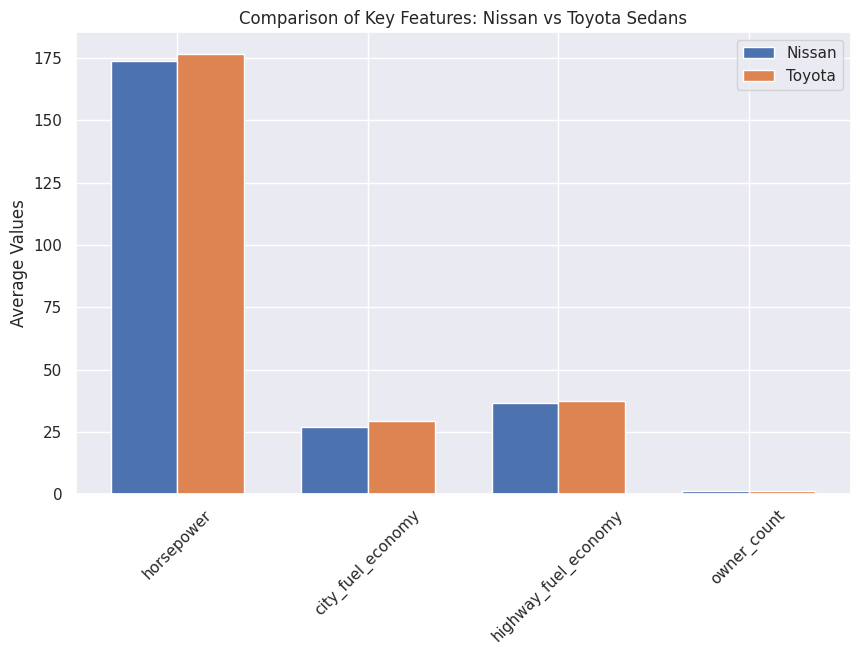

In [39]:
features = ['horsepower', 'city_fuel_economy', 'highway_fuel_economy','owner_count']
nissan_values = [df_nissan[feature].mean() for feature in features]
toyota_values = [df_toyota[feature].mean() for feature in features]

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, nissan_values, width, label='Nissan')
bars2 = ax.bar(x + width/2, toyota_values, width, label='Toyota')

ax.set_ylabel('Average Values')
ax.set_title('Comparison of Key Features: Nissan vs Toyota Sedans')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45)
ax.legend()

plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
features = [ 'horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'mileage', 'year']
scaler = StandardScaler()

# Combine Nissan and Toyota data for scaling
combined_data = pd.concat([df_nissan, df_toyota])
scaled_features = scaler.fit_transform(combined_data[features])

# Split back into Nissan and Toyota dataframes
scaled_nissan = scaled_features[:len(df_nissan)]
scaled_toyota = scaled_features[len(df_nissan):]

# Add normalized features to original dataframes
for i, feature in enumerate(features):
    df_nissan[f'{feature}_scaled'] = scaled_nissan[:, i]
    df_toyota[f'{feature}_scaled'] = scaled_toyota[:, i]

# Calculate average and max price for Nissan and Toyota
avg_price_nissan = df_nissan['price'].mean()
max_price_nissan = df_nissan['price'].max()

avg_price_toyota = df_toyota['price'].mean()
max_price_toyota = df_toyota['price'].max()

# Calculate price differences
average_price_difference = avg_price_toyota - avg_price_nissan
max_price_difference = max_price_toyota - max_price_nissan

average_price_difference, max_price_difference

(2318.034337275396, 0.0)

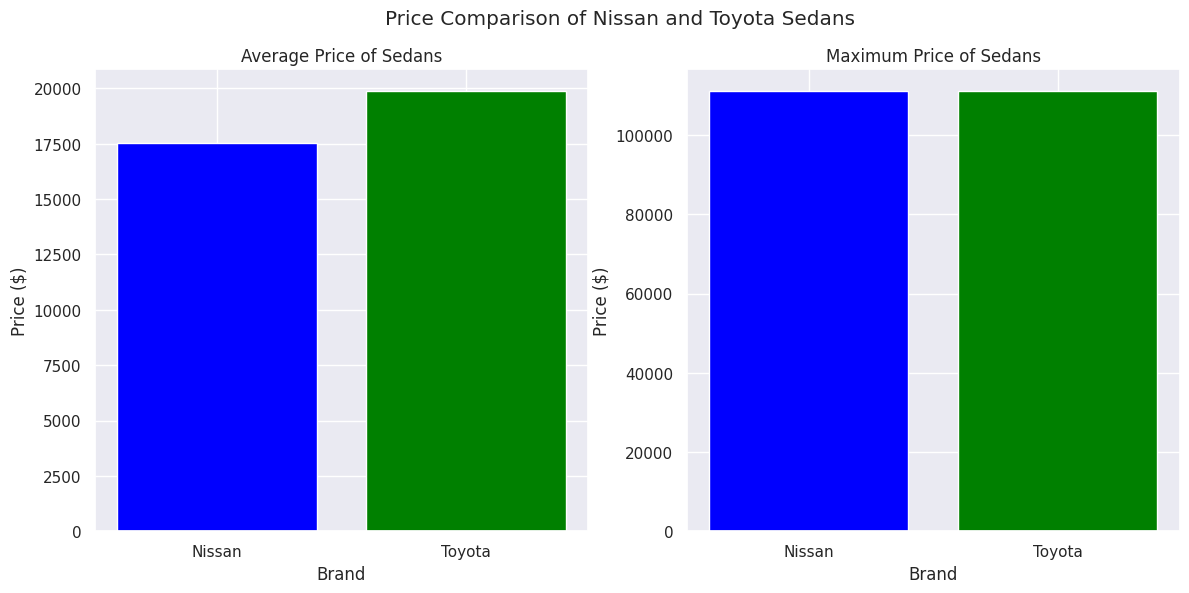

In [41]:
brands = ['Nissan', 'Toyota']
average_prices = [avg_price_nissan, avg_price_toyota]
max_prices = [max_price_nissan, max_price_toyota]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for average prices
ax[0].bar(brands, average_prices, color=['blue', 'green'])
ax[0].set_title('Average Price of Sedans')
ax[0].set_ylabel('Price ($)')
ax[0].set_xlabel('Brand')

# Bar chart for maximum prices
ax[1].bar(brands, max_prices, color=['blue', 'green'])
ax[1].set_title('Maximum Price of Sedans')
ax[1].set_ylabel('Price ($)')
ax[1].set_xlabel('Brand')

plt.suptitle('Price Comparison of Nissan and Toyota Sedans')
plt.show()

In [42]:
from scipy.stats import zscore

df_nt = data_cars[(data_cars['make_name'] == 'Nissan') | (data_cars['make_name'] == 'Toyota')]

# Calculate z-scores for price
df_nt['price_zscore'] = zscore(df_nt['price'])

# Identify anomalies (absolute z-score > 3)
anomalies = df_nt[np.abs(df_nt['price_zscore']) > 3]

# Display anomalies
anomalies

,body_type,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,make_name,mileage,owner_count,price,year,price_zscore
11319,Sedan,22.0,3500.0,31.0,301.0,Toyota,1.0,NaN,44009.0,2020,3.242290
13973,Sedan,22.0,3500.0,31.0,301.0,Toyota,31.0,NaN,45274.0,2020,3.404865
14015,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,45744.0,2020,3.465269
14039,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,46587.0,2020,3.573610
14219,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,42792.0,2020,3.085883
...,...,...,...,...,...,...,...,...,...,...,...
975482,Sedan,22.0,3500.0,31.0,301.0,Toyota,0.0,NaN,44889.0,2020,3.355386
975495,Sedan,43.0,2500.0,43.0,215.0,Toyota,0.0,NaN,46082.0,2020,3.508708
980767,Sedan,22.0,3500.0,31.0,301.0,Toyota,1.0,NaN,44964.0,2020,3.365025
986075,Sedan,22.0,3500.0,31.0,301.0,Toyota,138.0,NaN,42466.0,2020,3.043986


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


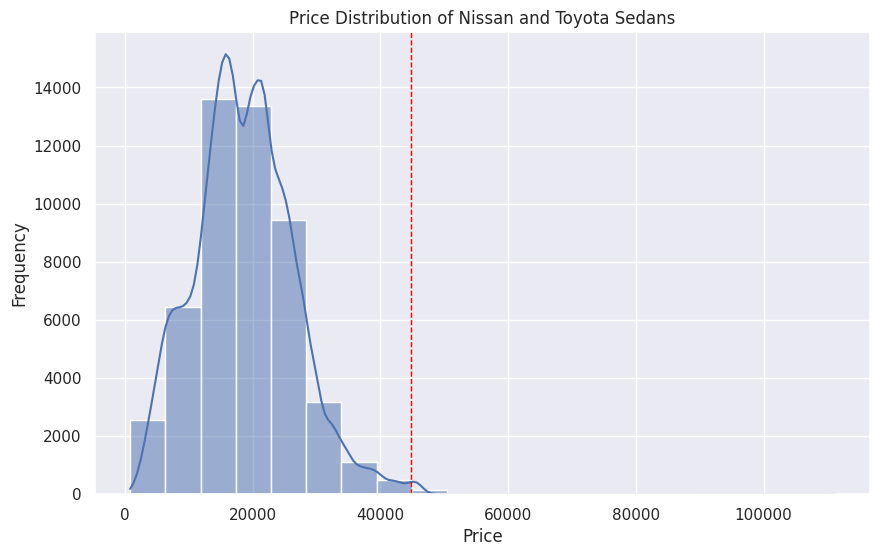

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df_nt['price'], bins=20, kde=True)
plt.axvline(anomalies['price'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Price Distribution of Nissan and Toyota Sedans')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


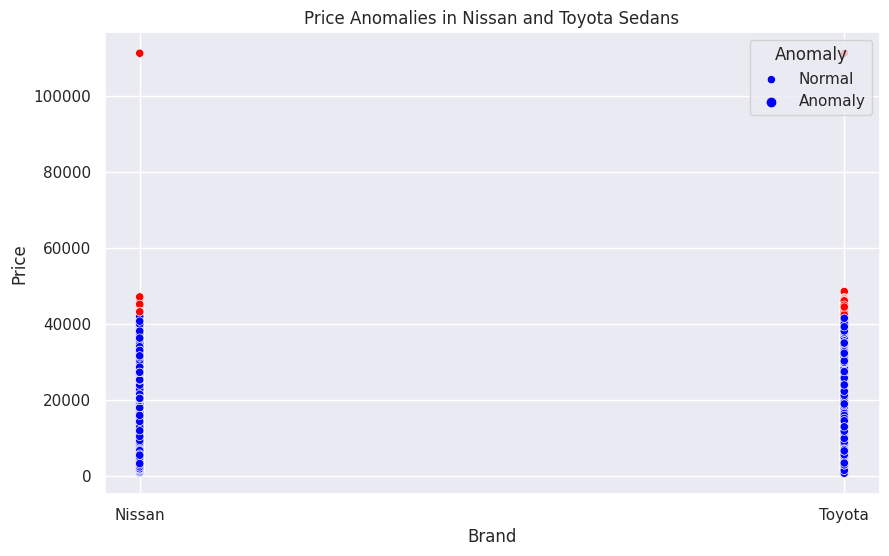

In [44]:

# Scatter plot with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nt, x='make_name', y='price', hue=np.abs(df_nt['price_zscore']) > 3, palette=['blue', 'red'])
plt.title('Price Anomalies in Nissan and Toyota Sedans')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


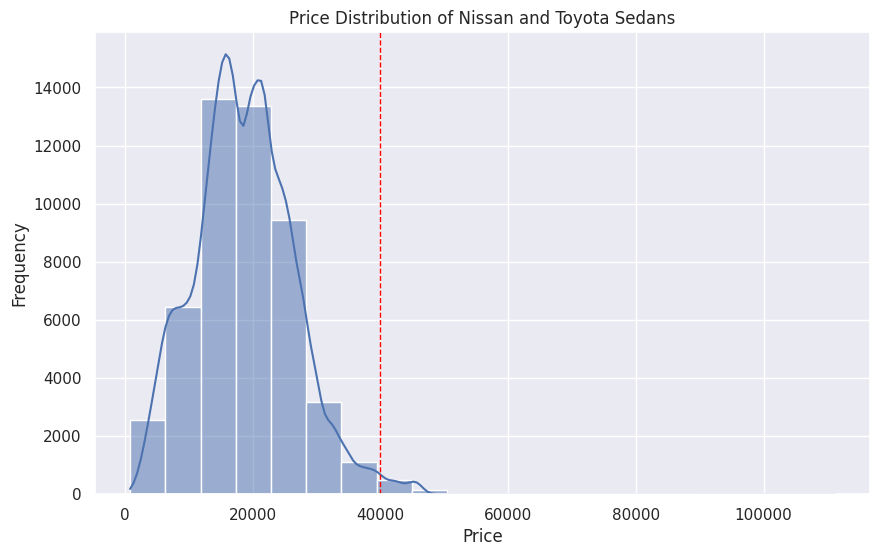

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df_nt['price'], bins=20, kde=True)
plt.axvline(40000, color='red', linestyle='dashed', linewidth=1)
plt.title('Price Distribution of Nissan and Toyota Sedans')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.pairplot(df_nt, hue='make_name', vars=['horsepower', 'mileage', 'year','city_fuel_economy', 'highway_fuel_economy' , 'price'])
plt.suptitle('Pair Plot of Features and Price', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1400x800 with 0 Axes>

In [ ]:
anomalies = df_nt[df_nt['price'] > 40000]
print(anomalies)

       body_type  city_fuel_economy  engine_displacement  \
11319      Sedan               22.0               3500.0   
13973      Sedan               22.0               3500.0   
14015      Sedan               43.0               2500.0   
14039      Sedan               43.0               2500.0   
14219      Sedan               43.0               2500.0   
...          ...                ...                  ...   
985992     Sedan               22.0               3500.0   
986051     Sedan                NaN                  NaN   
986075     Sedan               22.0               3500.0   
986424     Sedan               22.0               3500.0   
986878     Sedan               43.0               2500.0   

        highway_fuel_economy  horsepower make_name  mileage  owner_count  \
11319                   31.0       301.0    Toyota      1.0          NaN   
13973                   31.0       301.0    Toyota     31.0          NaN   
14015                   43.0       215.0    Toyota 

In [48]:
anomalies = df_nt[df_nt['price'] > 40000]
non_anomalies = df_nt[df_nt['price'] <= 40000]

In [51]:
anomalies_summary = anomalies.describe()
non_anomalies_summary = non_anomalies.describe()
anomalies_summary, non_anomalies_summary

(       city_fuel_economy  engine_displacement  highway_fuel_economy  \
 count         461.000000           468.000000            461.000000   
 mean           29.407809          3130.982906             35.308026   
 std            10.399554           490.074390              5.985537   
 min            20.000000          1500.000000             30.000000   
 25%            22.000000          2500.000000             31.000000   
 50%            22.000000          3500.000000             31.000000   
 75%            43.000000          3500.000000             43.000000   
 max            44.000000          3500.000000             47.000000   
 
        horsepower       mileage  owner_count          price         year  \
 count  468.000000    497.000000    13.000000     537.000000   537.000000   
 mean   268.760684    436.474849     1.538462   43508.260149  2020.040968   
 std     42.432392   2595.401373     0.518875    4592.927653     0.615561   
 min    106.000000      0.000000     1.000

In [52]:
anomalies_summary

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,price,year,price_zscore
count,461.000000,468.000000,461.000000,468.000000,497.000000,13.000000,537.000000,537.000000,537.000000
mean,29.407809,3130.982906,35.308026,268.760684,436.474849,1.538462,43508.260149,2020.040968,3.177935
std,10.399554,490.074390,5.985537,42.432392,2595.401373,0.518875,4592.927653,0.615561,0.590276
min,20.000000,1500.000000,30.000000,106.000000,0.000000,1.000000,40001.000000,2014.000000,2.727188
25%,22.000000,2500.000000,31.000000,215.000000,0.000000,1.000000,41570.000000,2020.000000,2.928833
50%,22.000000,3500.000000,31.000000,300.000000,3.000000,2.000000,43043.000000,2020.000000,3.118141
75%,43.000000,3500.000000,43.000000,301.000000,9.000000,2.000000,45109.000000,2020.000000,3.383660
max,44.000000,3500.000000,47.000000,301.000000,42215.000000,2.000000,111111.000000,2021.000000,11.866129


In [53]:
non_anomalies_summary

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,price,year,price_zscore
count,45903.000000,48821.000000,45903.000000,48821.000000,47362.000000,30548.000000,49781.000000,49781.000000,49781.000000
mean,28.194737,2284.531247,37.104024,174.262920,36828.633694,1.454694,18514.038354,2017.406782,-0.034281
std,5.643969,487.266746,4.324694,45.153891,45136.976623,0.787466,7369.114892,3.793030,0.947067
min,16.000000,1500.000000,22.000000,82.000000,0.000000,1.000000,800.000000,1969.000000,-2.310860
25%,26.000000,1800.000000,35.000000,132.000000,6.000000,1.000000,13506.000000,2017.000000,-0.677906
50%,28.000000,2500.000000,38.000000,178.000000,25229.500000,1.000000,18390.000000,2019.000000,-0.050222
75%,29.000000,2500.000000,39.000000,202.000000,50656.000000,2.000000,23590.000000,2020.000000,0.618073
max,55.000000,3500.000000,53.000000,301.000000,385729.000000,10.000000,39998.000000,2021.000000,2.726802


In [54]:
from scipy.stats import ttest_ind

# List of numerical features to compare
features = ['horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'mileage', 'year']

# Perform t-test for each feature
ttest_results = {feature: ttest_ind(anomalies[feature], non_anomalies[feature], equal_var=False) for feature in features}
ttest_results

{'horsepower': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'city_fuel_economy': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'highway_fuel_economy': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'mileage': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'year': TtestResult(statistic=83.5251640836738, pvalue=0.0, df=1063.0696689140677)}

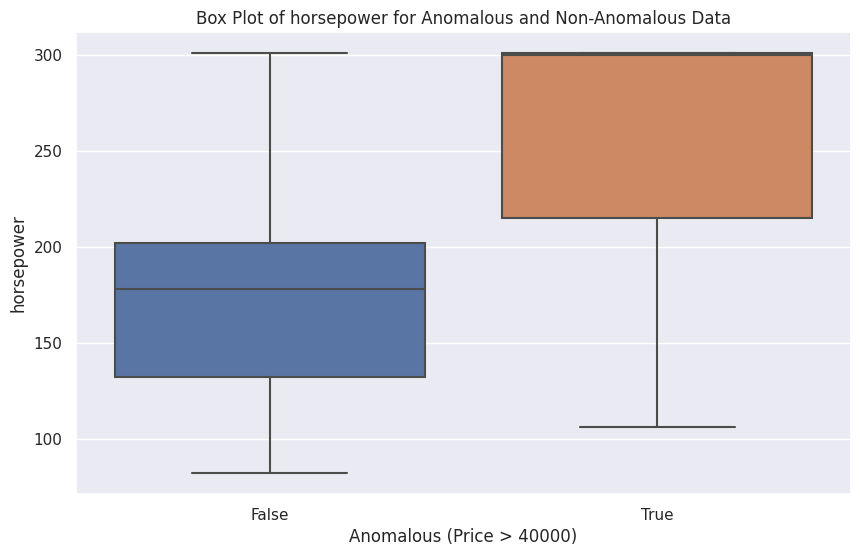

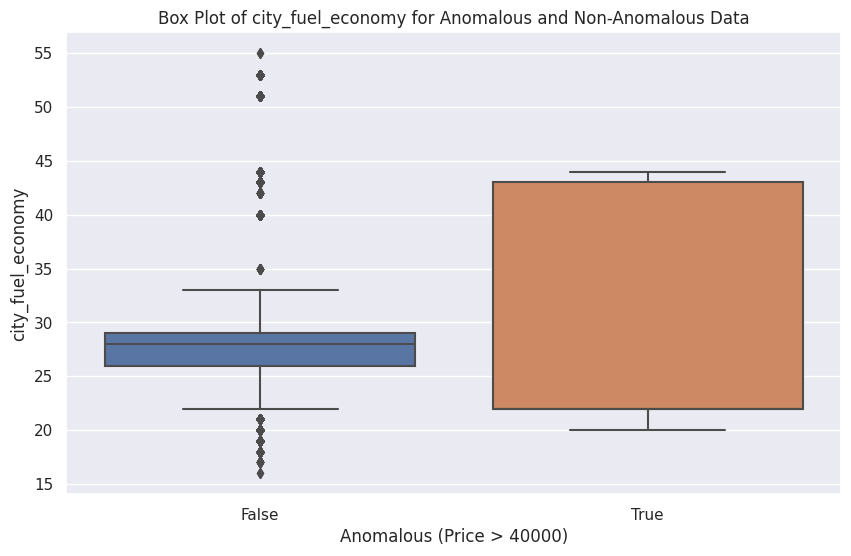

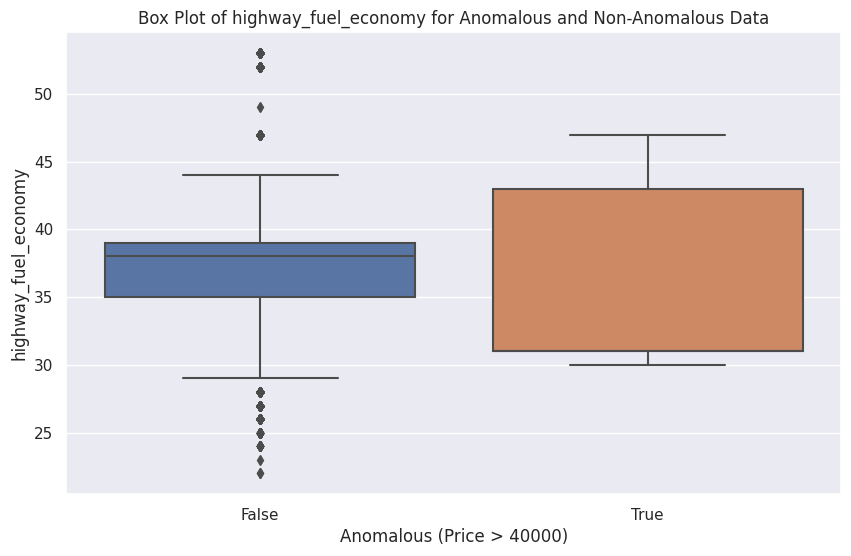

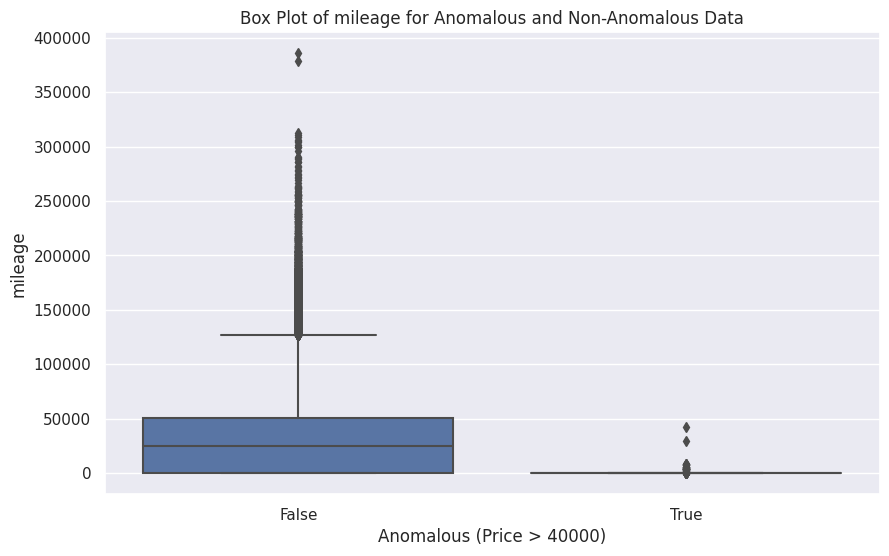

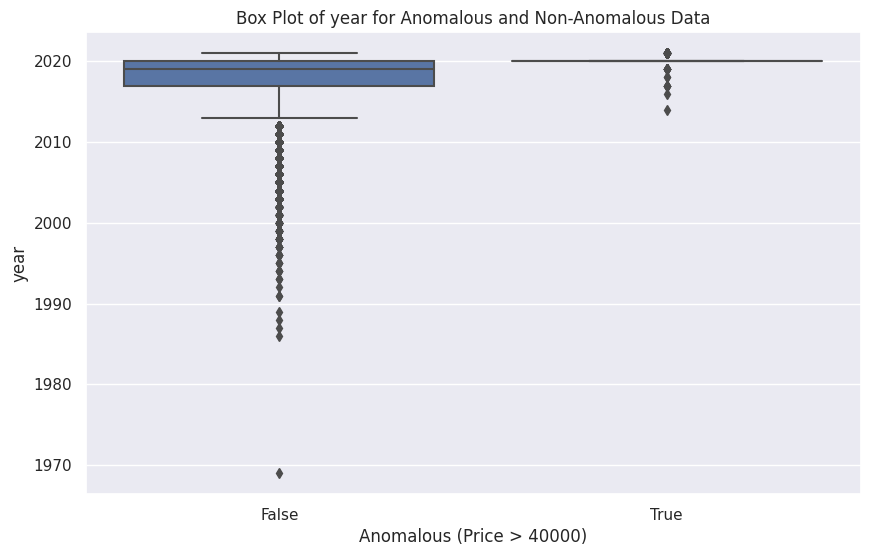

In [55]:
df_nt['anomalous_price'] = df_nt['price'] > 40000
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_nt, x='anomalous_price', y=feature)
    plt.title(f'Box Plot of {feature} for Anomalous and Non-Anomalous Data')
    plt.xlabel('Anomalous (Price > 40000)')
    plt.ylabel(feature)
    plt.show()

In [56]:
missing_values = df_nt.isnull().sum()
print(missing_values[missing_values > 0])

city_fuel_economy        3954
engine_displacement      1029
highway_fuel_economy     3954
horsepower               1029
mileage                  2459
owner_count             19757
dtype: int64


In [57]:
from sklearn.impute import SimpleImputer

# Separate features into numerical and categorical
numerical_features = df_nt.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_nt.select_dtypes(include=['object']).columns

# Impute numerical features with the mean
num_imputer = SimpleImputer(strategy='mean')
df_nt[numerical_features] = num_imputer.fit_transform(df_nt[numerical_features])

# Impute categorical features with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df_nt[categorical_features] = cat_imputer.fit_transform(df_nt[categorical_features])

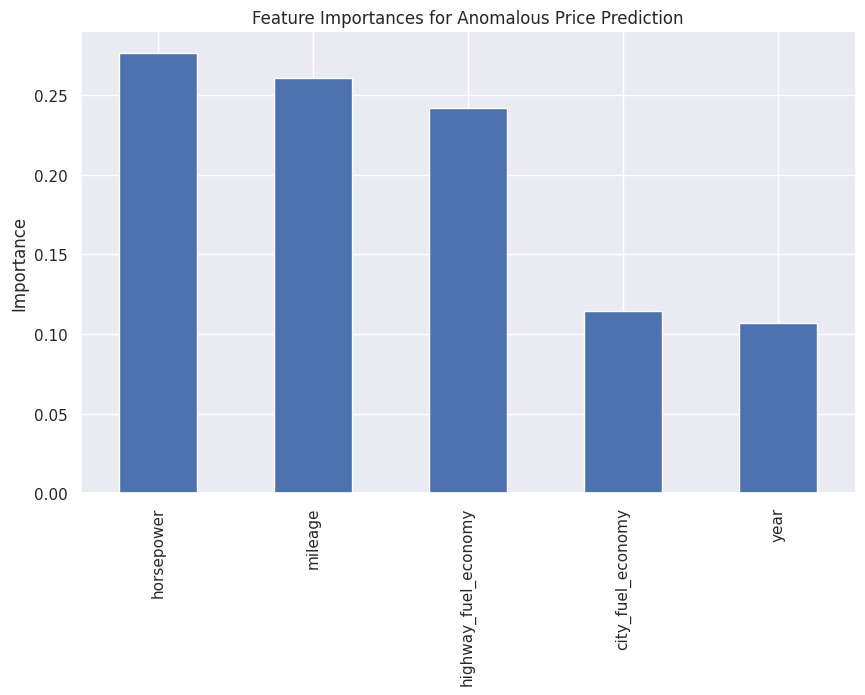

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data
df_nt['anomaly'] = df_nt['price'] > 40000
X = df_nt[features]
y = df_nt['anomaly']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances for Anomalous Price Prediction')
plt.ylabel('Importance')
plt.show()

In [59]:
from scipy.stats import ttest_ind

# Perform t-test for each feature
ttest_results = {feature: ttest_ind(anomalies[feature], non_anomalies[feature], equal_var=False) for feature in features}
ttest_results

{'horsepower': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'city_fuel_economy': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'highway_fuel_economy': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'mileage': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'year': TtestResult(statistic=83.5251640836738, pvalue=0.0, df=1063.0696689140677)}

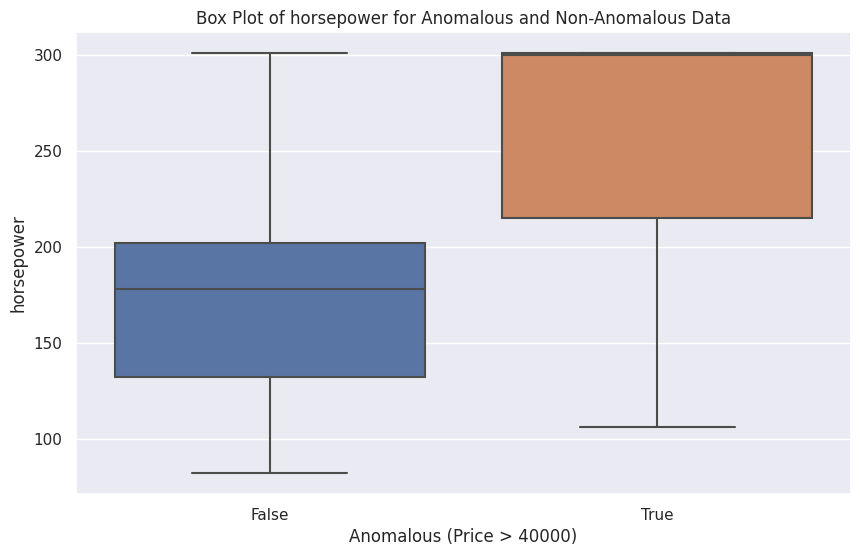

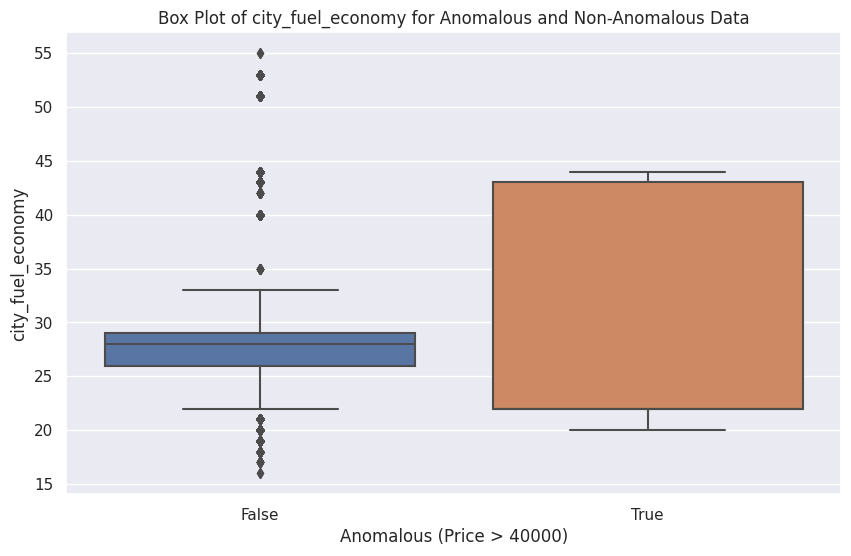

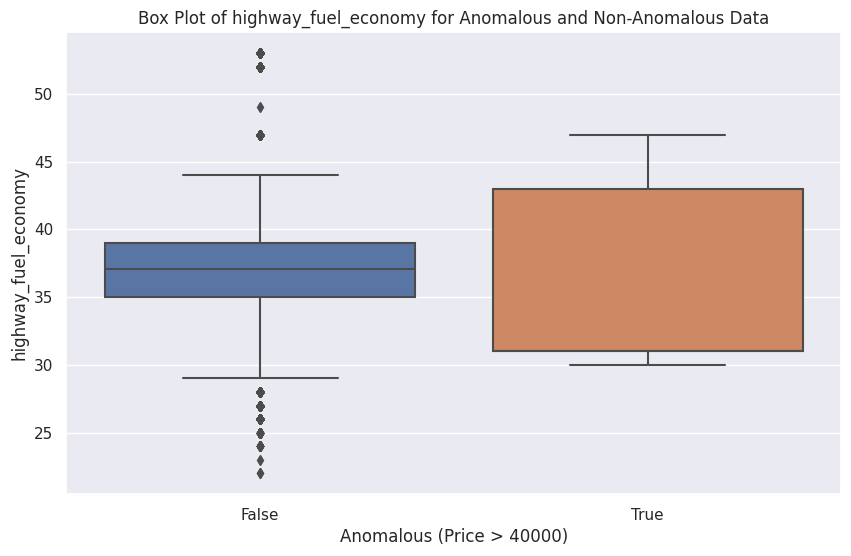

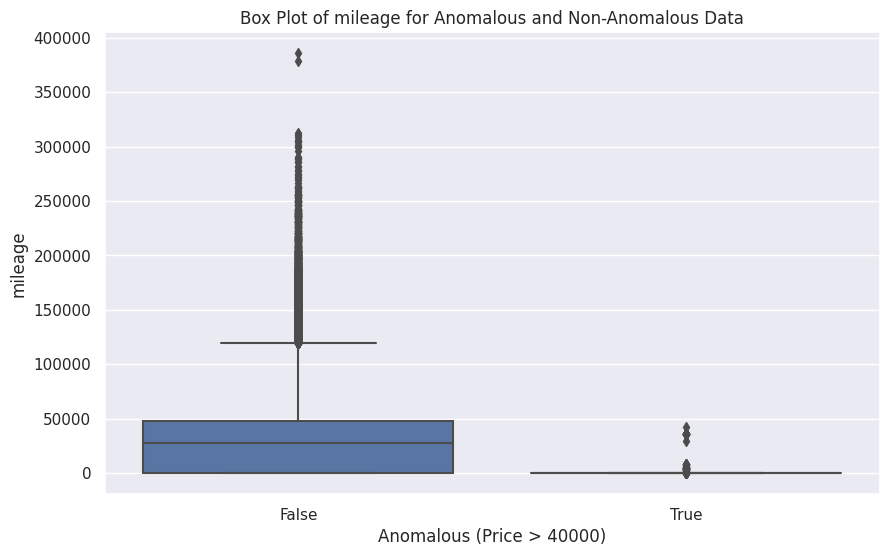

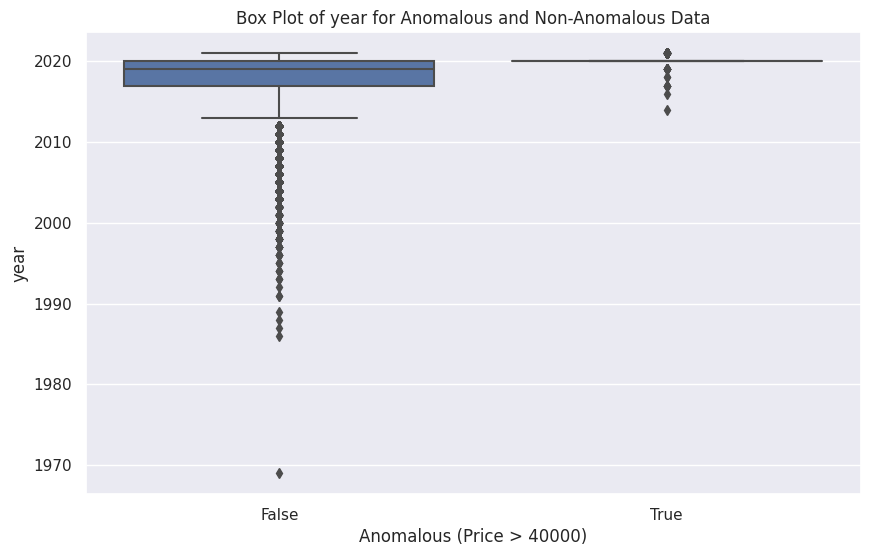

In [60]:
# Box plots for key features
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_nt, x='anomalous_price', y=feature)
    plt.title(f'Box Plot of {feature} for Anomalous and Non-Anomalous Data')
    plt.xlabel('Anomalous (Price > 40000)')
    plt.ylabel(feature)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


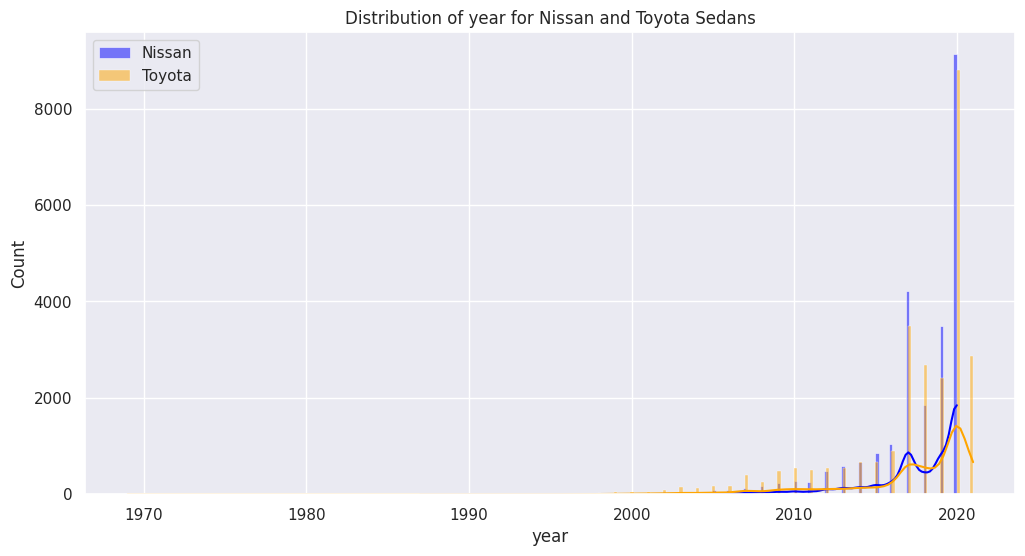

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


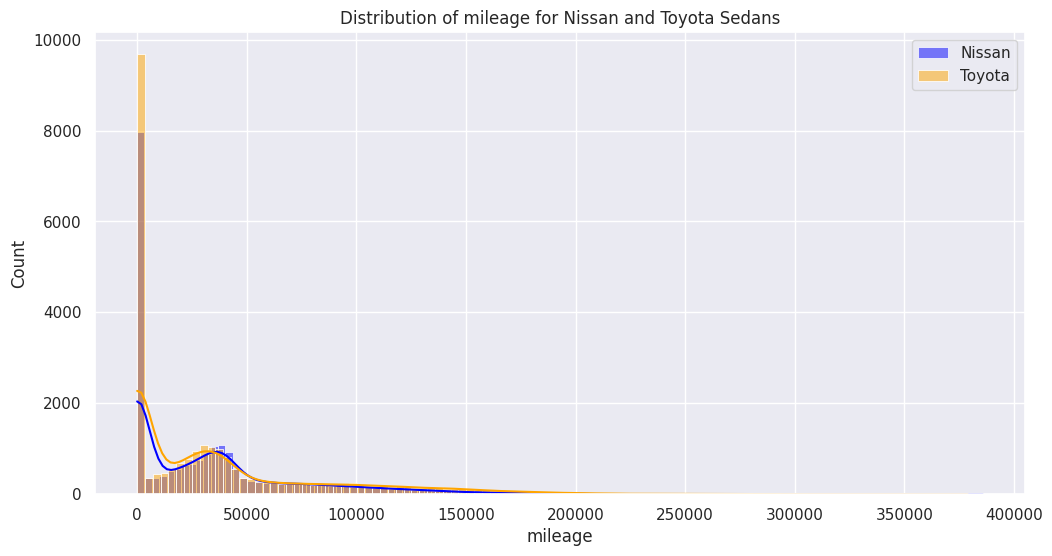

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


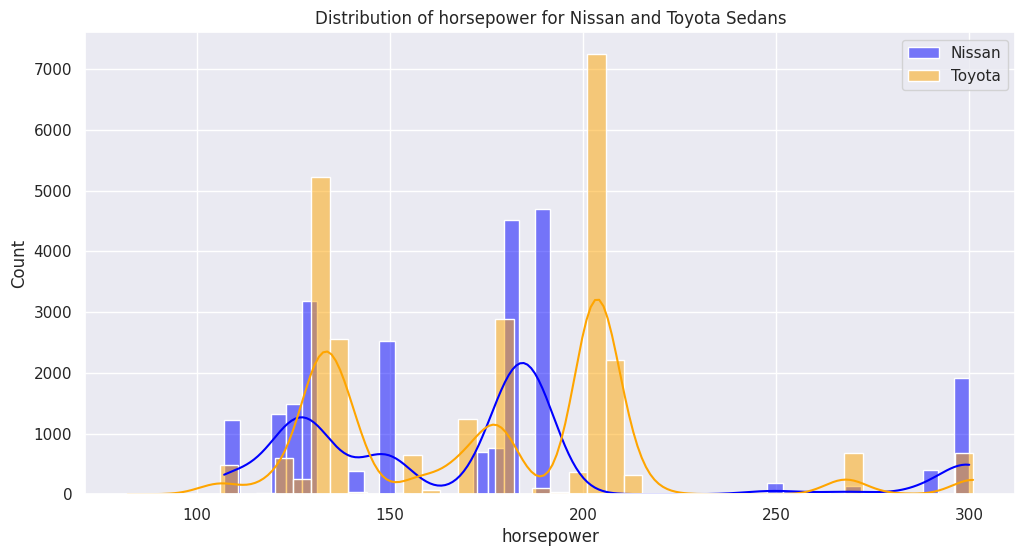

ValueError: Could not interpret value `engine_size` for parameter `x`

<Figure size 1200x600 with 0 Axes>

In [61]:
features_to_compare = ['year', 'mileage', 'horsepower', 'engine_size', 'fuel_efficiency']

# Plot histograms for each feature
for feature in features_to_compare:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data_cars[data_cars['make_name'] == 'Nissan'], x=feature, color='blue', label='Nissan', kde=True)
    sns.histplot(data=data_cars[data_cars['make_name'] == 'Toyota'], x=feature, color='orange', label='Toyota', kde=True)
    plt.title(f'Distribution of {feature} for Nissan and Toyota Sedans')
    plt.legend()
    plt.show()

In [66]:
features_to_compare = ['horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'mileage', 'year']
X = data_cars[features_to_compare]
y = data_cars['price']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=features_to_compare)


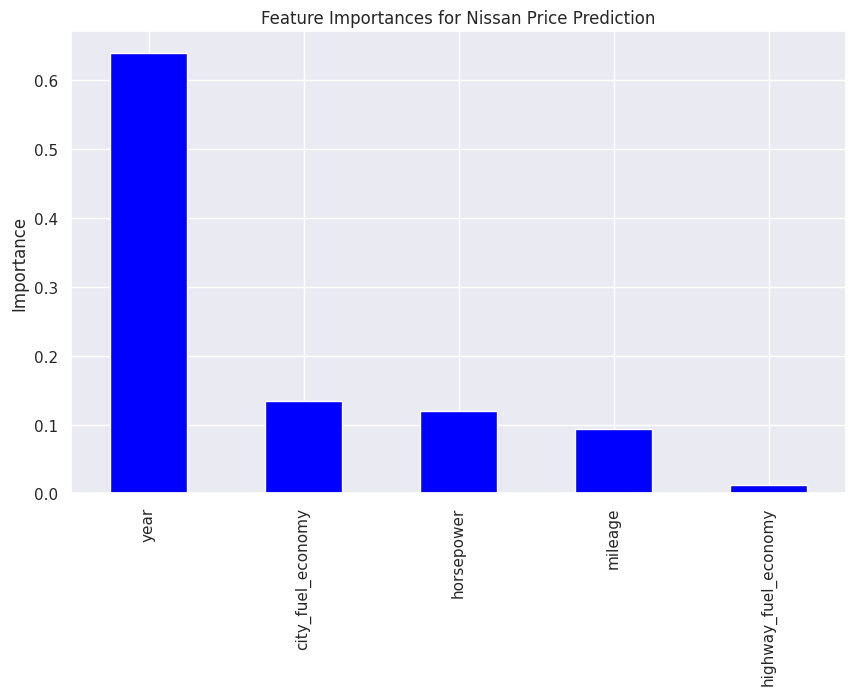

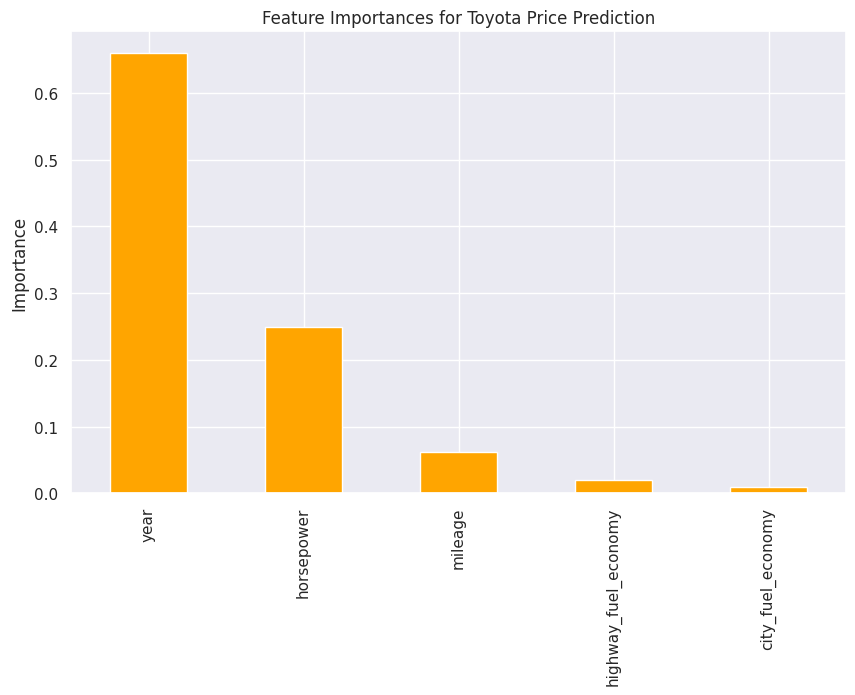

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)


# Separate data for Nissan and Toyota
nissan_data = data_cars[data_cars['make_name'] == 'Nissan']
toyota_data = data_cars[data_cars['make_name'] == 'Toyota']

# Impute missing values for each brand separately
X_nissan_imputed = imputer.fit_transform(nissan_data[features_to_compare])
X_toyota_imputed = imputer.fit_transform(toyota_data[features_to_compare])

# Train separate models for Nissan and Toyota
rf_nissan = RandomForestRegressor(random_state=42)
rf_toyota = RandomForestRegressor(random_state=42)

rf_nissan.fit(X_nissan_imputed, nissan_data['price'])
rf_toyota.fit(X_toyota_imputed, toyota_data['price'])

# Feature importances
importances_nissan = rf_nissan.feature_importances_
importances_toyota = rf_toyota.feature_importances_

feature_importances_nissan = pd.Series(importances_nissan, index=features_to_compare).sort_values(ascending=False)
feature_importances_toyota = pd.Series(importances_toyota, index=features_to_compare).sort_values(ascending=False)

# Plot feature importances for Nissan
plt.figure(figsize=(10, 6))
feature_importances_nissan.plot(kind='bar', color='blue')
plt.title('Feature Importances for Nissan Price Prediction')
plt.ylabel('Importance')
plt.show()

# Plot feature importances for Toyota
plt.figure(figsize=(10, 6))
feature_importances_toyota.plot(kind='bar', color='orange')
plt.title('Feature Importances for Toyota Price Prediction')
plt.ylabel('Importance')
plt.show()


In [49]:
from scipy.stats import zscore

df_nt = data_cars[(data_cars['make_name'] == 'Nissan') | (data_cars['make_name'] == 'Toyota') | (data_cars['make_name'] == 'Honda')]

# Calculate z-scores for price
df_nt['price_zscore'] = zscore(df_nt['price'])

# Identify anomalies (absolute z-score > 3)
anomalies = df_nt[np.abs(df_nt['price_zscore']) > 3]

# Display anomalies
anomalies

,body_type,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,make_name,mileage,owner_count,price,year,price_zscore
11319,Sedan,22.0,3500.0,31.0,301.0,Toyota,1.0,NaN,44009.0,2020,3.261907
13973,Sedan,22.0,3500.0,31.0,301.0,Toyota,31.0,NaN,45274.0,2020,3.428279
14015,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,45744.0,2020,3.490094
14039,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,46587.0,2020,3.600965
14219,Sedan,43.0,2500.0,43.0,215.0,Toyota,5.0,NaN,42792.0,2020,3.101847
...,...,...,...,...,...,...,...,...,...,...,...
975482,Sedan,22.0,3500.0,31.0,301.0,Toyota,0.0,NaN,44889.0,2020,3.377644
975495,Sedan,43.0,2500.0,43.0,215.0,Toyota,0.0,NaN,46082.0,2020,3.534547
980767,Sedan,22.0,3500.0,31.0,301.0,Toyota,1.0,NaN,44964.0,2020,3.387508
986075,Sedan,22.0,3500.0,31.0,301.0,Toyota,138.0,NaN,42466.0,2020,3.058972


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


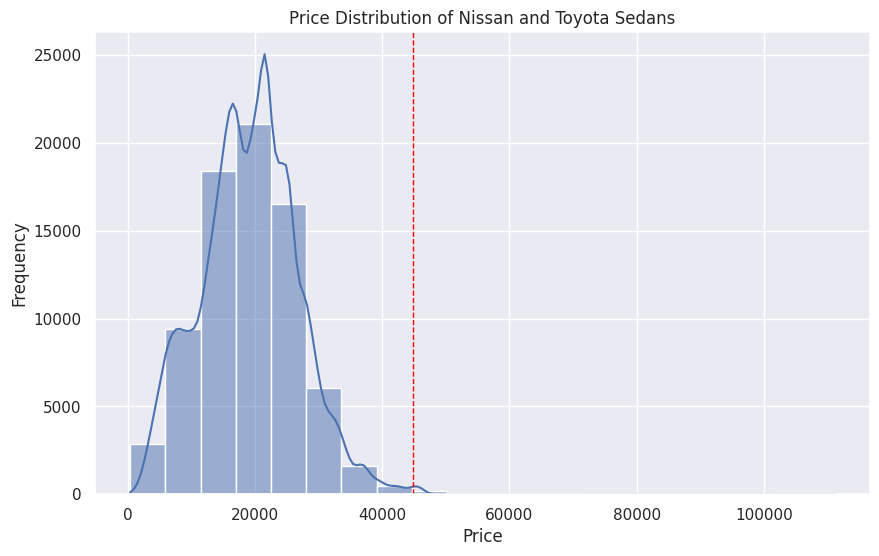

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_nt['price'], bins=20, kde=True)
plt.axvline(anomalies['price'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Price Distribution of Nissan and Toyota Sedans')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

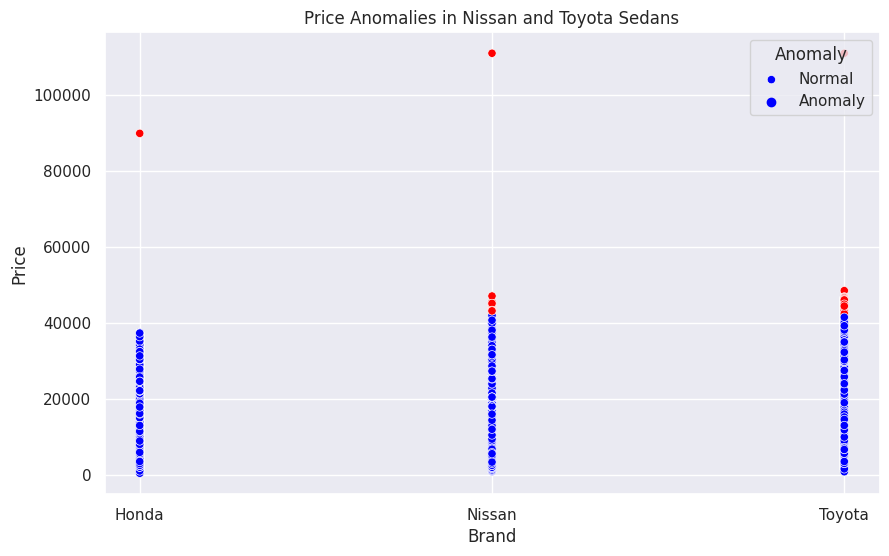

In [51]:
# Scatter plot with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nt, x='make_name', y='price', hue=np.abs(df_nt['price_zscore']) > 3, palette=['blue', 'red'])
plt.title('Price Anomalies in Nissan and Toyota Sedans')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

Number of anomalies detected: 7913
                      vin back_legroom  bed bed_height bed_length  \
283     JTDKB20U140019907      38.6 in  NaN        NaN        NaN   
346     1N6AA07B34N529263      40.4 in  NaN         --    67.1 in   
373     WDCYC7DF7EX227468      41.9 in  NaN        NaN        NaN   
378     WDCYC7DF1EX228082      41.9 in  NaN        NaN        NaN   
381     2FTRX18LX1CA75497      32.2 in  NaN         --    78.8 in   
...                   ...          ...  ...        ...        ...   
998332  2GCEK13TX61157821      39.1 in  NaN         --    69.2 in   
998615  SCBEC9ZA1GC053170      42.2 in  NaN        NaN        NaN   
998893  WDD2211791A131153      42.3 in  NaN        NaN        NaN   
998906  JTDKN3DUXF1877896        36 in  NaN        NaN        NaN   
999471  JTDKN3DU6D5660027        36 in  NaN        NaN        NaN   

              body_type cabin        city  city_fuel_economy  \
283           Hatchback   NaN      Linden               48.0   
346     

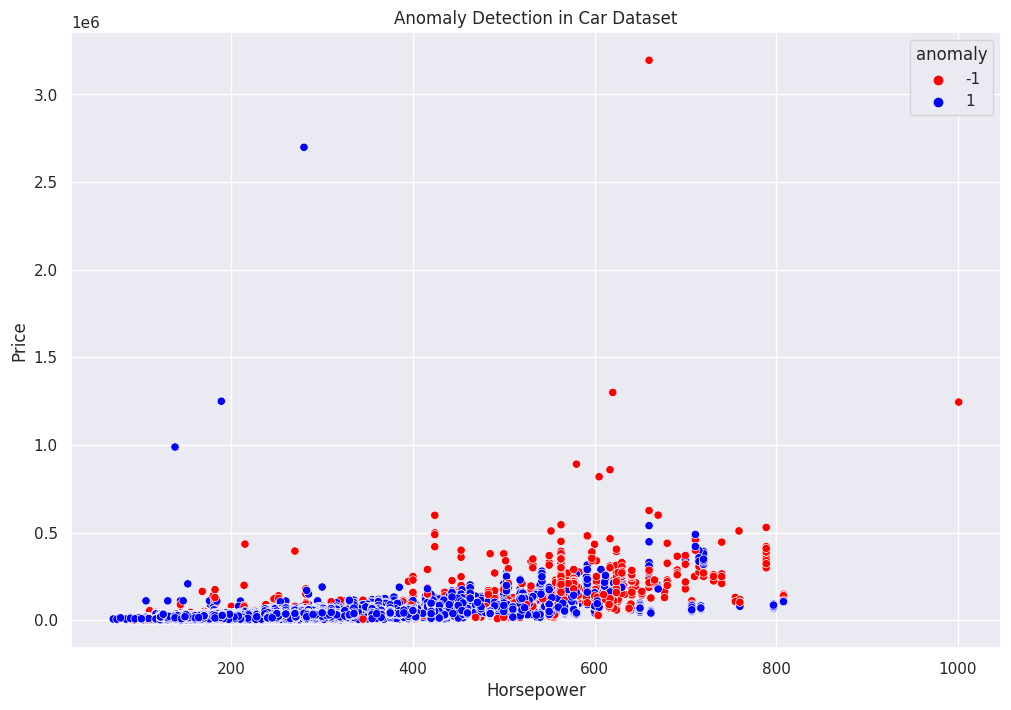

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

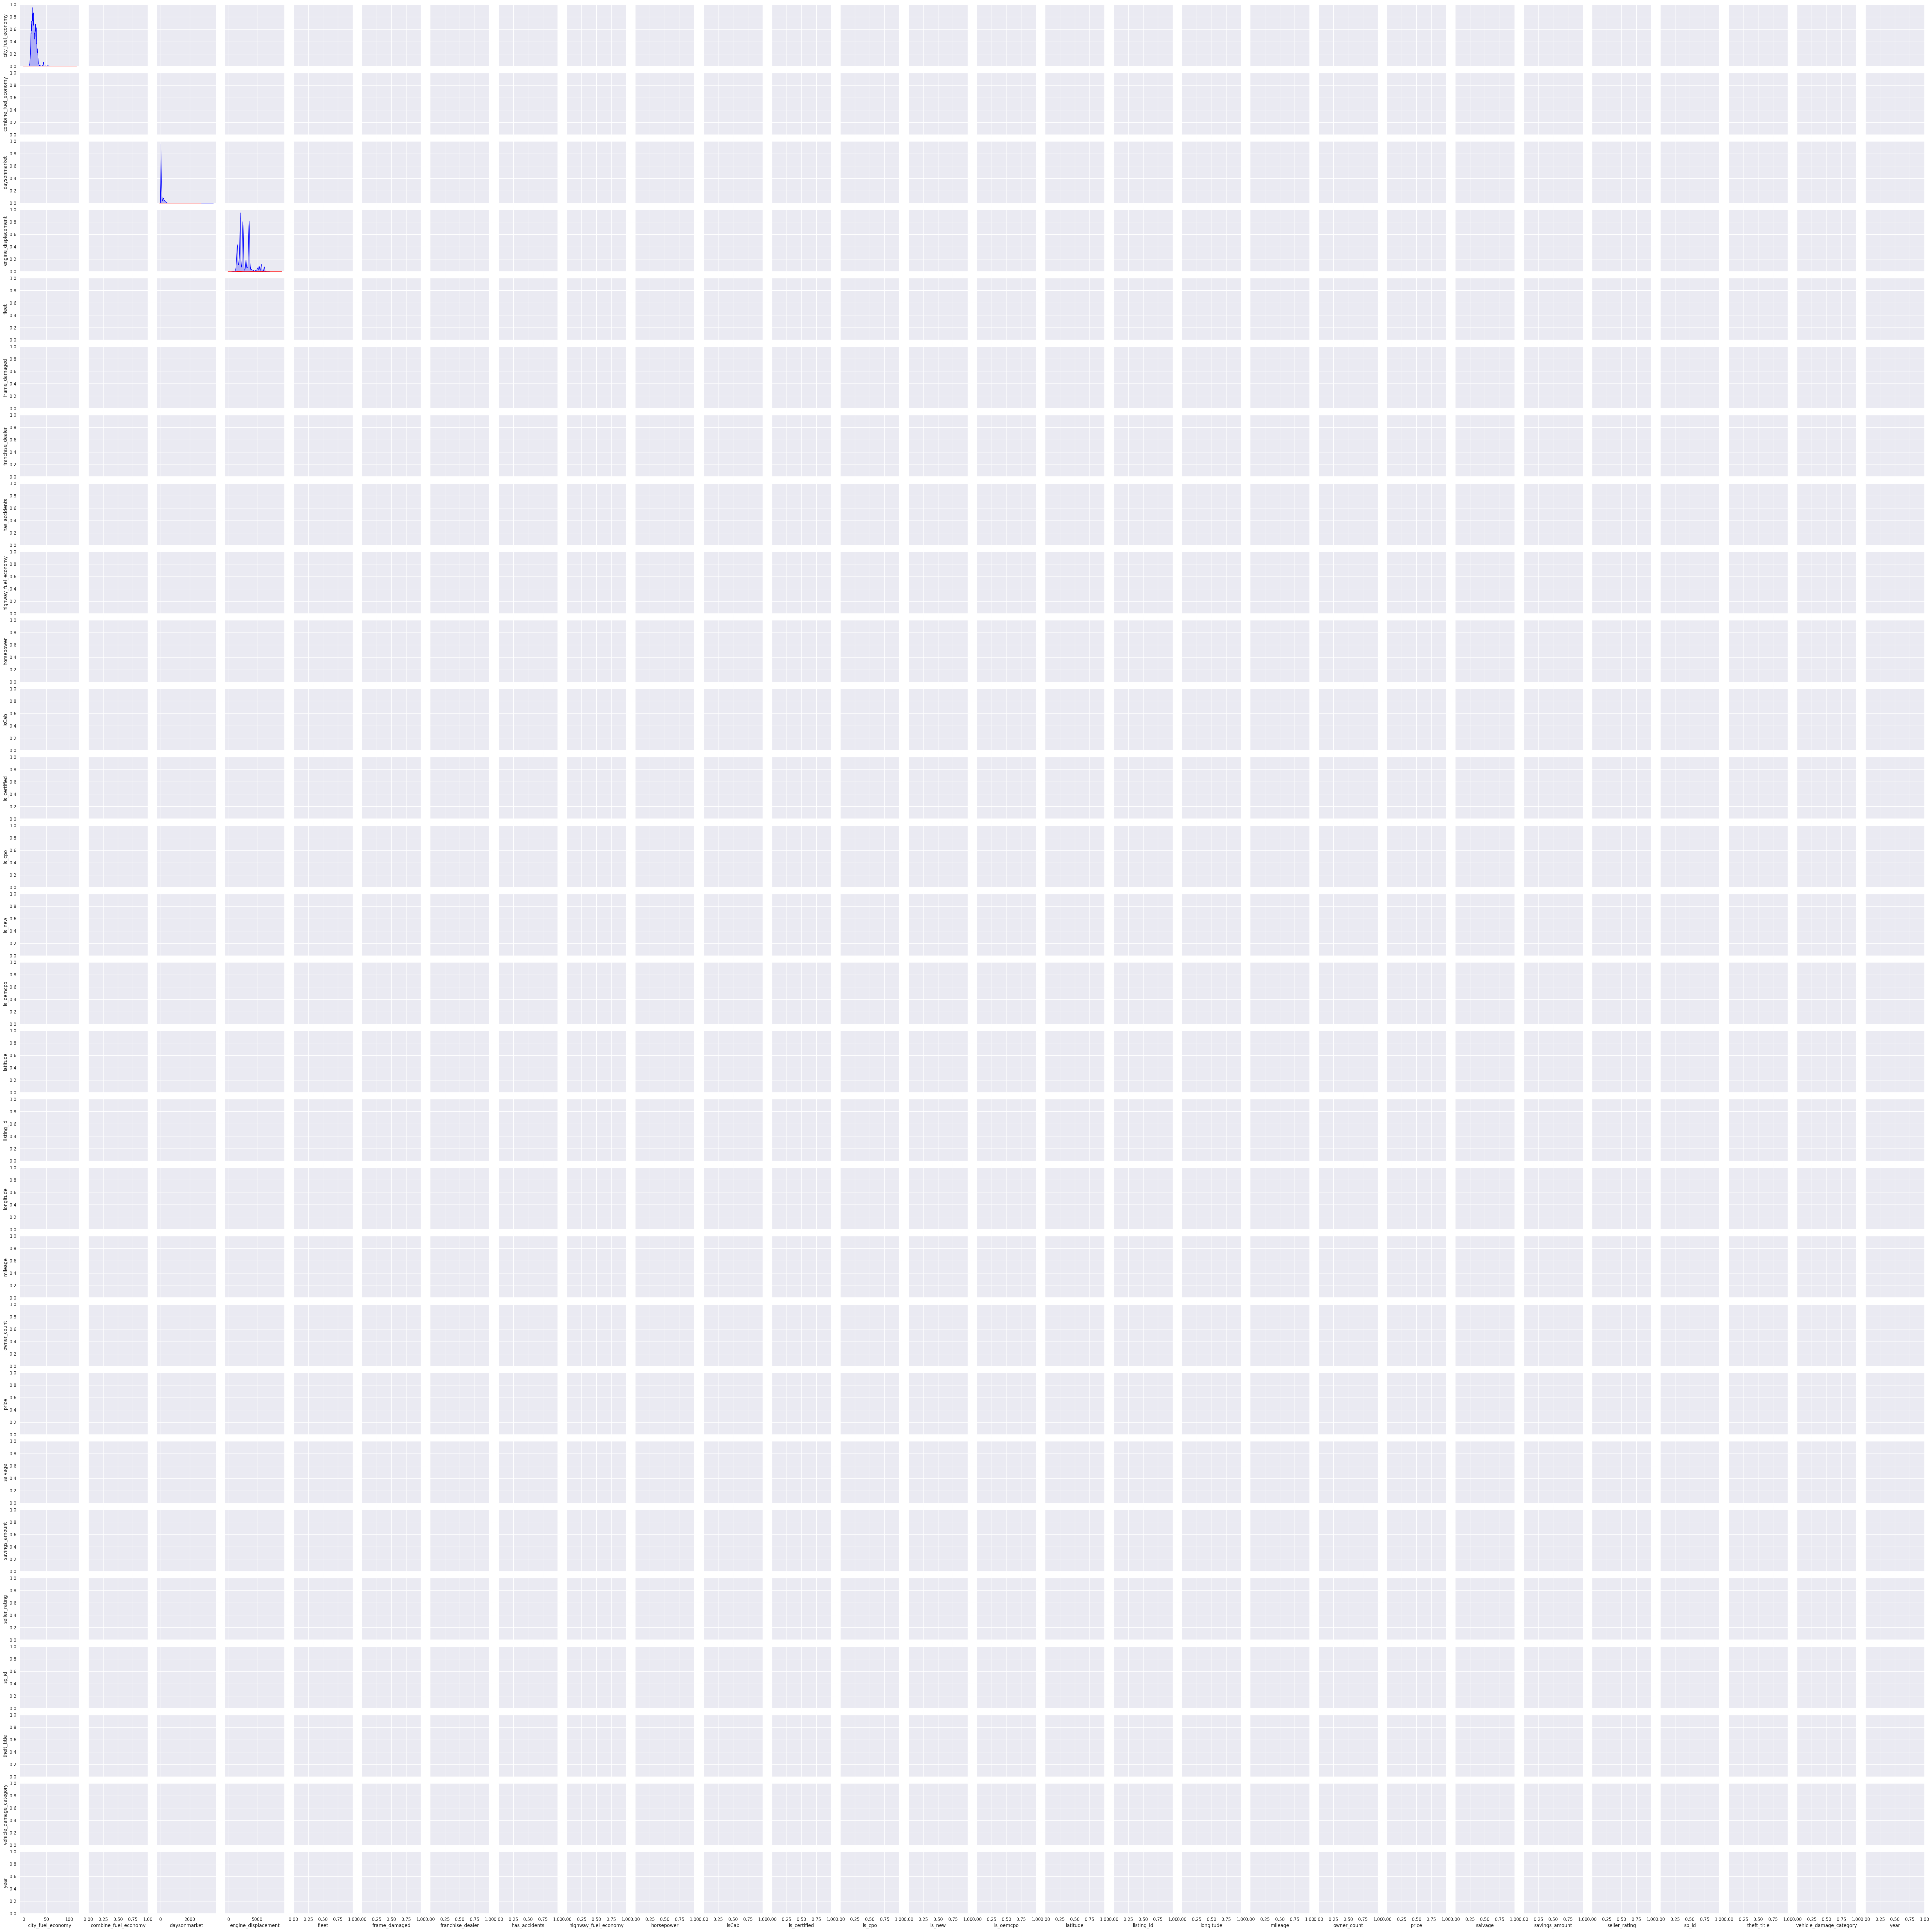

In [53]:

from sklearn.ensemble import IsolationForest


features = ['price', 'horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'mileage', 'year']

# Handle missing values by imputing or dropping
data = data.dropna(subset=features)  # Dropping rows with missing values in the selected features
# Alternatively, you can use imputation methods:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df[features] = imputer.fit_transform(df[features])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(scaled_features)

# Filter anomalies
anomalies = data[data['anomaly'] == -1]

# Analyze anomalies
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies)

# Visualize anomalies using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='horsepower', y='price', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Car Dataset')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# Optionally, you can plot a pairplot to see the anomalies in different feature combinations
sns.pairplot(data, hue='anomaly', diag_kind='kde', palette={1: 'blue', -1: 'red'})
plt.show()
